#  <center>Text Analysis using TF-IDF and Document Search</center>
### <center>Group Members: Gayane Ghazaryan, Anna Manasyan</center>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from utils import extract_wiki_data, remove_stopwords, normalize_text, calculate_word_frequency_rank, plot_zipfs_law, search_documents
from utils import calculate_tfidf
import warnings
warnings.filterwarnings('ignore')

## Problem 1: Data Preparation

#### Download the Wikipedia text data from Hugging Face, using the 20220301.simple dataset. Extract the first 20,000 articles from the data, store them in a pandas dataframe. 

In [1]:
#extract_wiki_data("20220301.simple", 20000)

In [4]:
wiki_data = pd.read_csv("wikipedia.csv")
wiki_data.head()

,id,url,title,text
0,1,https://simple.wikipedia.org/wiki/April,April,April is the fourth month of the year in the J...
1,2,https://simple.wikipedia.org/wiki/August,August,August (Aug.) is the eighth month of the year ...
2,6,https://simple.wikipedia.org/wiki/Art,Art,Art is a creative activity that expresses imag...
3,8,https://simple.wikipedia.org/wiki/A,A,A or a is the first letter of the English alph...
4,9,https://simple.wikipedia.org/wiki/Air,Air,Air refers to the Earth's atmosphere. Air is a...


#### Perform normalization on the text data: tokenization, lemmatization, lowercase transformation, punctuation and stop word removal. 

In [5]:
wiki_data_norm = normalize_text(wiki_data['text'])

In [6]:
wiki_norm = pd.DataFrame(wiki_data_norm)
wiki_norm.head()

,text
0,"[april, be, the, fourth, month, of, the, year,..."
1,"[august, aug, be, the, eighth, month, of, the,..."
2,"[art, be, a, creative, activity, that, express..."
3,"[a, or, a, be, the, first, letter, of, the, en..."
4,"[air, refers, to, the, earth, atmosphere, air,..."


*As applying normalization to the data took a long time, we decided to save the results.*

In [5]:
# wiki_data_norm.to_csv("wikipedia_norm.csv", encoding='utf-8', index=False)

### Problem 2: Word Frequencies and Zipf's Law

#### Calculating the frequency and rank of each word in the dataset.

In [7]:
x = calculate_word_frequency_rank(wiki_norm['text'])
x.head()

,word,frequency,rank
0,the,455125,1
1,be,283413,2
2,of,243175,3
3,and,186604,4
4,in,176391,5


#### Plotting the word frequencies against their rank in a log-log scale and fitting a line to the plot that represents Zipf's Law.

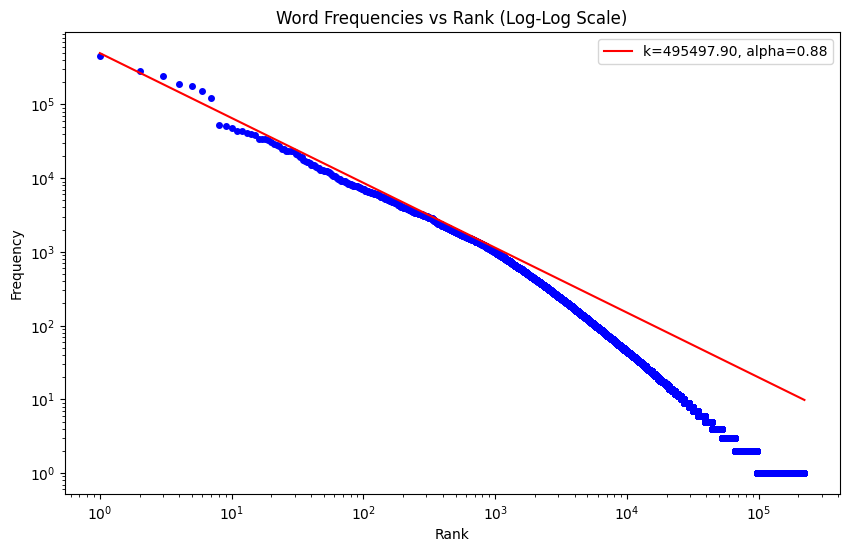

<Figure size 640x480 with 0 Axes>

In [8]:
plot_zipfs_law(x)

Zipf's Law states that the frequency of words is inversely proportional to their rank and the most common word. So this means the second most frequent word is half as frequent as the most common, the third one is one-third as common as the most common, and so on. <br>
Generally, a steeper slope (higher absolute value of alpha) indicates a stronger adherence to Zipf's Law, while a shallower slope (lower absolute value of alpha) indicates a weaker adherence to Zipf's Law. <br>
In our case, our alpha is 0.88, which suggests that the distribution of word frequencies still follows a power-law pattern, but it's not as strong or steep as expected under Zipf's Law. The more frequent words will still dominate the overall distribution, however the differences in frequency between the most common words and those lower in rank will be less pronounced

### Problem 3: TF-IDF and Document Representation

Calculate the term frequency (TF) and inverse document frequency (IDF) for each word in the dataset. After calculating the TF-IDF for each document, normalize the document TF-IDF vector. Write a function for normalizing the TF-IDF vectors that can be used for both documents and queries. Store the normalized TF-IDF vectors for further use.

*We used TfidfTransformer() from sklearn, which automatically applies l2 normalization on the TF-IDF vector. The function has two modes: one for documents and one for queries*

In [9]:
wiki_norm['text'] = wiki_norm['text'].apply(remove_stopwords)

In [10]:
tfidf_matrix = calculate_tfidf(wiki_norm['text'])

### Problem 4: Document Search

Write a function that takes a query as input and performs normalization on the query as you did for the original data. Calculate the TF-IDF representation of the query and normalize it using the function created in Problem 3. 

*Added a query mode to the normalize_text() function.*

* #### Query 1

In [11]:
query = 'english and german language'

#### Normalizing the query

In [12]:
query_norm = normalize_text(query, mode = 'query')
query_norm = remove_stopwords(query_norm)
query_norm

['english', 'german', 'language']

#### Calculating TF-IDF

In [13]:
query_tfidf_vector = calculate_tfidf(wiki_norm['text'], query_norm, mode='query')

#### Document Search

In [14]:
top_k_indices, top_k_similarities, top_k_documents = search_documents(wiki_norm['text'], tfidf_matrix, query_tfidf_vector, k=10)
top_k_documents

546      [english, language, start, anglo-saxon, englan...
216      [language, normal, way, human, communicate, hu...
746      [german, german, deutsch, west, germanic, lang...
531      [english, second, language, common, phrase, re...
15182    [german, people, germany, descendant, child, g...
6131     [language, isolate, language, know, relate, la...
692      [language, family, group, language, relate, co...
1154     [partial, list, natural, language, arrange, al...
256      [first, language, also, mother, language, moth...
741      [german, mean, different, thing, anything, rel...
Name: text, dtype: object

In [15]:
wiki_data['title'][top_k_indices]

546                  English language
216                          Language
746                   German language
531      English as a second language
15182                         Germans
6131                 Language isolate
692                   Language family
1154                List of languages
256                    First language
741                            German
Name: title, dtype: object

* #### Query 2

In [16]:
query1 = 'animal rights protection'

#### Normalizing the query

In [17]:
query_norm1 = normalize_text(query1, mode = 'query')
query_norm1

['animal', 'right', 'protection']

#### Calculating TF-IDF

In [18]:
query_tfidf_vector = calculate_tfidf(wiki_norm['text'], query_norm1, mode='query')

#### Document Search

In [19]:
top_k_indices, top_k_similarities, top_k_documents = search_documents(wiki_norm['text'], tfidf_matrix, query_tfidf_vector, k=10)
top_k_documents

8189     [animal, right, term, use, general, belief, no...
13925    [protection, mean, group, people, thing, try, ...
17888    [animal, liberation, movement, animal, right, ...
35       [animal, metazoa, live, creature, many, cell, ...
12081    [civil, right, right, people, country, civil, ...
4520     [universal, declaration, human, right, declara...
4433     [human, right, right, freedom, people, today, ...
13752    [amnesty, international, also, call, ai, amnes...
1833     [insectivore, animal, insect, eat, mostly, ins...
6919     [animal, farm, short, novel, george, orwell, w...
Name: text, dtype: object

In [20]:
wiki_data['title'][top_k_indices]

8189                             Animal rights
13925                               Protection
17888               Animal liberation movement
35                                      Animal
12081                             Civil rights
4520     Universal Declaration of Human Rights
4433                              Human rights
13752                    Amnesty International
1833                               Insectivore
6919                               Animal Farm
Name: title, dtype: object

* #### Query 3

In [21]:
query2 = 'William Shakespeare'

#### Normalizing the query

In [22]:
query_norm2 = normalize_text(query2, mode = 'query')
query_norm2

['william', 'shakespeare']

#### Calculating TF-IDF

In [23]:
query_tfidf_vector = calculate_tfidf(wiki_norm['text'], query_norm2, mode='query')

#### Document Search

In [24]:
top_k_indices, top_k_similarities, top_k_documents = search_documents(wiki_norm['text'], tfidf_matrix, query_tfidf_vector, k=10)
top_k_documents

8182     [titus, andronicus, c, 15891592, first, traged...
8183     [comedy, error, c, 158994, one, first, play, w...
18204    [sir, john, shakespeare, ii, c, 1530-september...
3945     [stratford-upon-avon, town, england, famous, b...
6505     [event, start, golden, age, netherlands, begin...
8181     [love, labour, lose, comedy, play, william, sh...
16465    [list, 27, moon, uranus, list, long, take, orb...
10526    [tragedy, julius, caesar, play, william, shake...
1625     [william, conqueror, 1087, also, know, william...
6577     [event, war, austria, venice, birth, may, 25, ...
Name: text, dtype: object

In [25]:
wiki_data['title'][top_k_indices]

8182          Titus Andronicus
8183      The Comedy of Errors
18204         John Shakespeare
3945       Stratford-upon-Avon
6505                     1610s
8181      Love's Labour's Lost
16465    List of Uranus' moons
10526     Julius Caesar (play)
1625     William the Conqueror
6577                      1616
Name: title, dtype: object

### Problem 5: Evaluation and Reporting
Evaluate the performance of your search function using example queries and discuss the results.

*Looking at the three query examples provided above, we come to the conclusion that the search algrorithm works adequately.* <br>

*The first query was a relatively simple one. Looking at the results we can see that there's a logical connection between the articles and the query. The results are mainly comprised of articles on the English and German languages, however, there are some articles about language in general as well.* <br>

*For the second query, we think the algorithm didn't work as  great. Only 2 of the articles were directly related to animal rights protection. 4 articles were returned on the topic of Human Rights Protection.* <br>

*The third query was a very specific one and while the searching algorithm didn't manage to find the author himself (perhaps that article wasn't part of the data) it managed to return some of the authors works. However, there was noise too, i.e. people who had the same name.* <br>

*Overall, we think that this is a good start and the performance of the search algorithm can be imporoved by increasing our dataset.*
